# Sesion 6: Visualización avanzada de Datos

### Treemaps

In [1]:
!pip install plotly --upgrade

     |████████████████████████████████| 23.9 MB 12 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:
#Treemaps
import plotly.express as px

fig = px.treemap(
    names = ['A','B','C','D','E','a','b', 'c','d','x','y','z'],
    parents = ['','','','','','A','B','B','E','b','a','d']
)

fig.show()

In [9]:
# Usando el dataset de atletas
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasets_BEDU/Remoto athlete_olympic_events-clean.csv', index_col = 0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [10]:
#Agrupamos por nombres y queremos los valores maximos
df_grouped = df.groupby('name')[['sex', 'sport']].max()
df_grouped.head()

,sex,sport
name,,
Th Anh,F,Fencing
Th Ngn Thng,F,Gymnastics
Tin Tun,M,Boxing
A Dijiang,M,Basketball
A Lamusi,M,Judo


In [11]:
df_grouped['count'] = 1

In [12]:
# Deporte por sexo
fig = px.treemap(df_grouped, path = ['sport', 'sex'], values = 'count')
fig.show()

In [7]:
# Sexo por deporte que practican
fig = px.treemap(df_grouped, path = ['sex', 'sport'], values = 'count')
fig.show()

NameError: ignored

### Reto 1

In [ ]:
# cargamos base
data = pd.read_csv("/content/drive/MyDrive/datasets_BEDU/Remoto melbourne_housing-clean.csv", index_col = 0)
data.head()

In [ ]:
data['city'] = 'Melbourne'

In [ ]:
#Treemaps
import plotly.express as px
fig = px.treemap(data, path = ['city','region_name', 'type'], values = 'land_size')
fig.show()

In [ ]:
# Otra forma directa de colocar una label especifica como Parent
fig = px.treemap(data, path = [px.Constant('Melburne'),'region_name', 'type'], values = 'land_size')
fig.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_grouped = df.groupby('name')[['height', 'weight', 'sex', 'team', 'sport']].max()

In [ ]:
#Especificamos unicamente los que sea China
china = df_grouped[df_grouped['team'] == 'China']

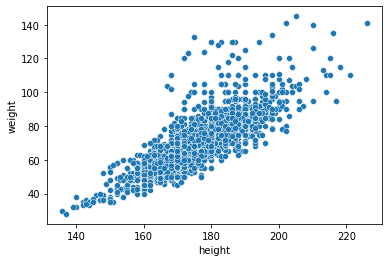

In [ ]:
sns.scatterplot(x = china['height'], y = china['weight']);

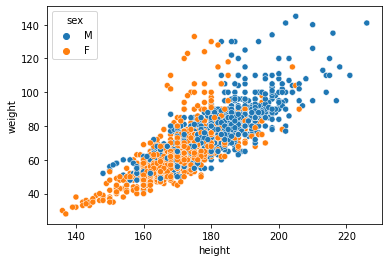

In [ ]:
#Dividimos por sexo
sns.scatterplot(x = china['height'], y = china['weight'], hue = china['sex']);

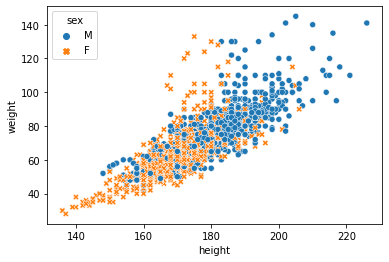

In [ ]:
# Agreagndo un fromato distinto de puntos utilizando style
sns.scatterplot(x = china['height'], y = china['weight'], hue = china['sex'], style = china['sex']);

In [ ]:
# Diferencias de peso y altura entre deportes
df_grouped = df.groupby('name')[['weight', 'height', 'sport']].max()

In [ ]:
#Especificamos los deportes de interes
df_sports = df_grouped[df_grouped['sport'].isin(['Basketball','Volleyball','Football','Baseball'])]

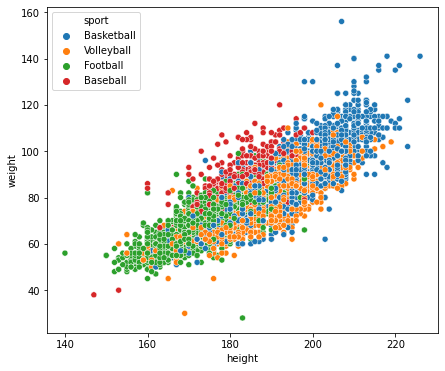

In [ ]:
#Graficamos
plt.figure(figsize = (7,6))
sns.scatterplot( x= df_sports['height'], y = df_sports['weight'], hue = df_sports['sport']);

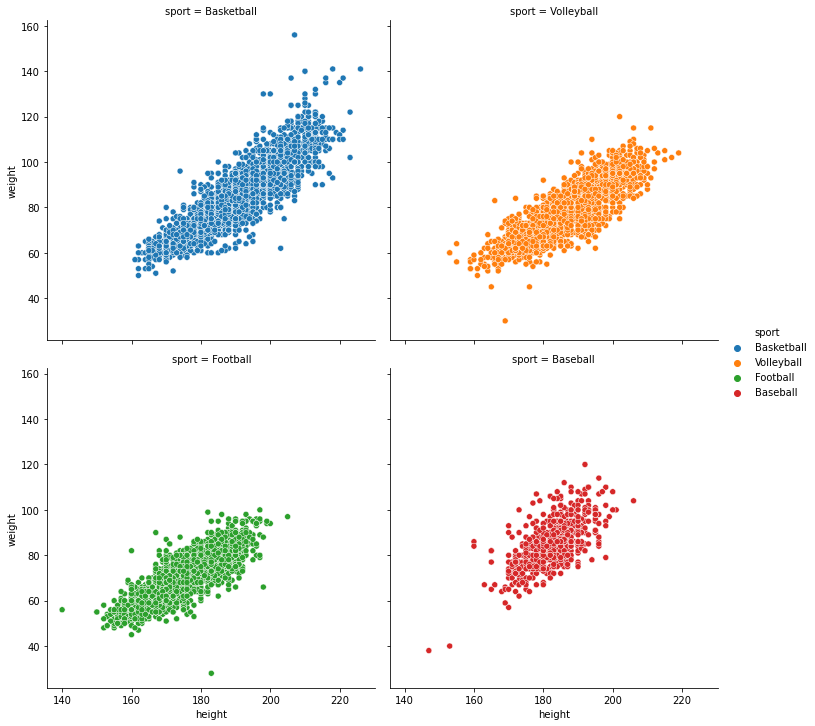

In [ ]:
# Dividimos por deporte
# Con col wrap le dedcimos cuantas categorías por línea
sns.relplot( data = df_sports, x = 'height', y = 'weight', hue = 'sport', col = 'sport', col_wrap = 2);

In [ ]:
# Reto 2
wine = pd.read_csv("/content/drive/MyDrive/datasets_BEDU/Remoto wine_quality_red-clean.csv", index_col = 0)
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


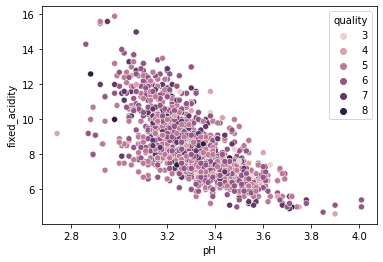

In [ ]:
sns.scatterplot(x = wine['pH'], y = wine['fixed_acidity'], hue = wine['quality']);

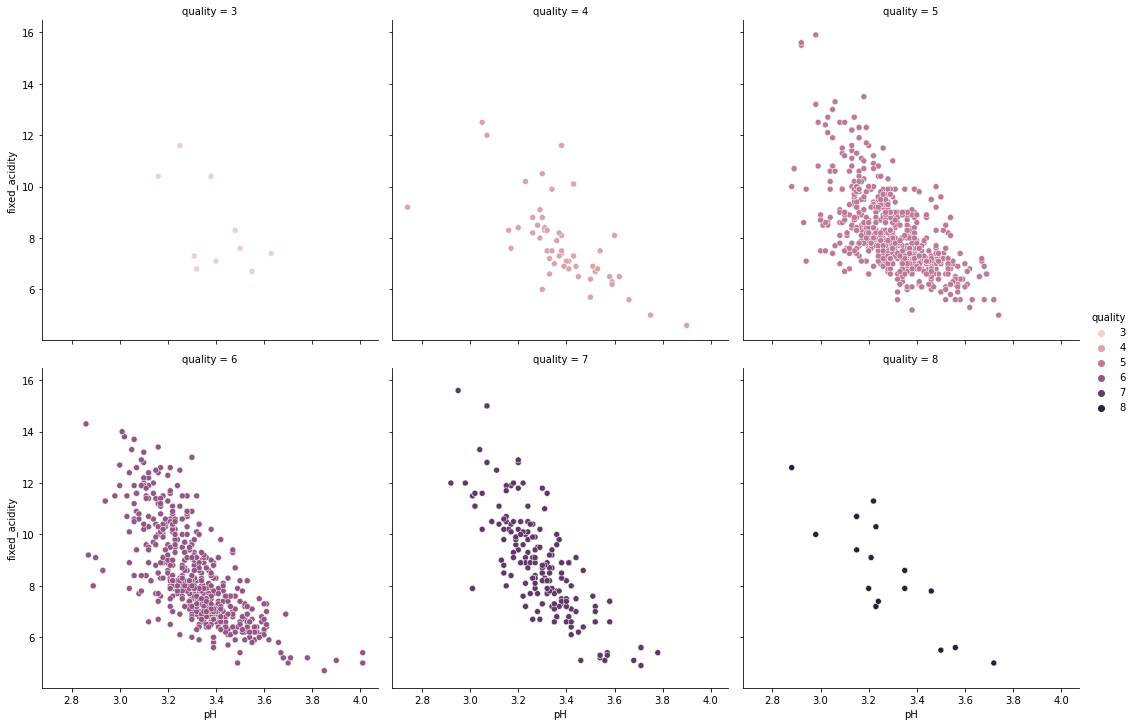

In [ ]:
sns.relplot(data = wine, x = 'pH', y = 'fixed_acidity', hue = 'quality', col = 'quality', col_wrap = 3);

## Mapas cloropleticos

In [ ]:
#!pip install folium --upgrade

In [13]:
## GeoJSON
import folium
import pandas as pd

state_geo = "/content/drive/MyDrive/datasets_BEDU/Remoto us_states.json"
state_empl = pd.read_csv("/content/drive/MyDrive/datasets_BEDU/Remoto us_unemployment-oct_2012.csv")


# location no es enecsario pero tendremos una imagen de todo el mudo
# Con location que el buscador con gogle maps podemos encontrar nos da especificamente el mapa de interes

# 1. Mapeamos el territorio de interes
m = folium.Map(location =[28.3879249,-103.5720075], zoom_start = 4)

# 2. Datos/indicadores a mapear

folium.Choropleth(
    name = 'Desempleo_US',
    geo_data = state_geo, #indicamos archivo de coordenadas
    data = state_empl, #indicamos archivo de los datos a mapear
    columns  = ['State', 'Unemployment'], # indicamos variables de interes a mapear del data
    key_on = 'feature.id',#indicamos la variable/columna de coincidencia entre coordenadas y data
    fill_color = 'YlGn',
    legend_name = 'Desempleo %',

).add_to(m) # se lo pegamos a nuestro mapa que llamamos m

folium.LayerControl().add_to(m) # Agregamos la capa interactiva de la esquina superior derecha

m



## RETO 3

In [18]:
mexico = "/content/drive/MyDrive/datasets_BEDU/Remoto mexico.json"
data_mx = pd.read_csv("/content/drive/MyDrive/datasets_BEDU/Remoto poblacion_mexico_2010.csv")

mapa = folium.Map(location = [28.3879249,-103.5720075], zoom_start = 5)

folium.Choropleth(
    name = 'Población de México',
    geo_data = mexico, #indicamos archivo de coordenadas
    data = data_mx, #indicamos archivo de los datos a mapear
    columns  = ['estado', 'poblacion'], # indicamos variables de interes a mapear del data
    key_on = 'feature.properties.name',#indicamos la variable/columna de coincidencia entre coordenadas y data
    fill_color = 'RdPu',
    legend_name = 'Población'

).add_to(mapa) # se lo pegamos a nuestro mapa que llamamos m

folium.LayerControl().add_to(mapa);

mapa



Notemos que haye tres estados que no se pintan, es por motivos de que los nombres de los datos no hacen match, por lo que hay que reemplazarlos:

## Graficas de barras apiladas

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("/content/drive/MyDrive/datasets_BEDU/Remoto athlete_olympic_events-clean.csv", index_col = 0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [29]:
#Agrupamos por nombre, sexo y deporte
df_grouped = df.groupby('name')[['sex', 'sport']].max()

In [31]:
#Ahora queremos solo los que si estan en los 4 deportes especificos
df_ball = df_grouped[df_grouped['sport'].isin(['Basketball', 'Volleyball', 'Football', 'Baseball'])]

In [32]:
value_counts = df_ball['sport'].value_counts()
value_counts

Football      3993
Basketball    2607
Volleyball    2374
Baseball       703
Name: sport, dtype: int64

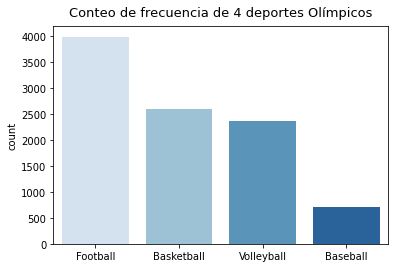

In [51]:
# Graficamos lo anterior

sns.barplot(x = value_counts.index, y = value_counts, palette='Blues');
plt.ylabel('count')
plt.title('Conteo de frecuencia de 4 deportes Olímpicos', fontsize=13, pad=10);

Ahora queremos segmentar o anterior por sexo

In [52]:
df_grouped['count'] = 1
df_grouped.head()

,sex,sport,count
name,,,
Th Anh,F,Fencing,1
Th Ngn Thng,F,Gymnastics,1
Tin Tun,M,Boxing,1
A Dijiang,M,Basketball,1
A Lamusi,M,Judo,1


In [53]:
df_ball_with_count = df_grouped[df_grouped['sport'].isin(['Basketball', 'Volleyball', 'Football', 'Baseball'])]

In [54]:
value_counts = df_ball_with_count.groupby(['sport', 'sex'])['count'].sum()
value_counts

sport       sex
Baseball    M       703
Basketball  F       877
            M      1730
Football    F       703
            M      3290
Volleyball  F      1074
            M      1300
Name: count, dtype: int64

In [55]:
value_counts = value_counts.unstack(1)
value_counts

sex,F,M
sport,,
Baseball,NaN,703.0
Basketball,877.0,1730.0
Football,703.0,3290.0
Volleyball,1074.0,1300.0


In [56]:
value_counts = value_counts.fillna(0)

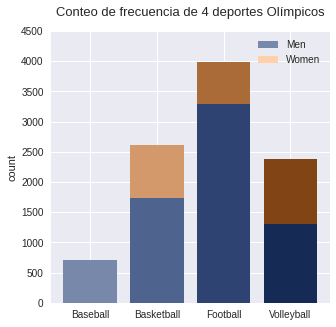

In [57]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['M'], label='M',
              color=["#7788AA","#4E638E","#2E4372","#152A55"])
plt2 = ax.bar(value_counts.index, value_counts['F'], bottom=value_counts['M'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"])

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de 4 deportes Olímpicos', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Men', 'Women'));
ax.set_ylim(0, 4500);